In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline






In [3]:
df = pd.read_csv('moviereviews2.tsv',sep='\t')
df.head()

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...


<Axes: >

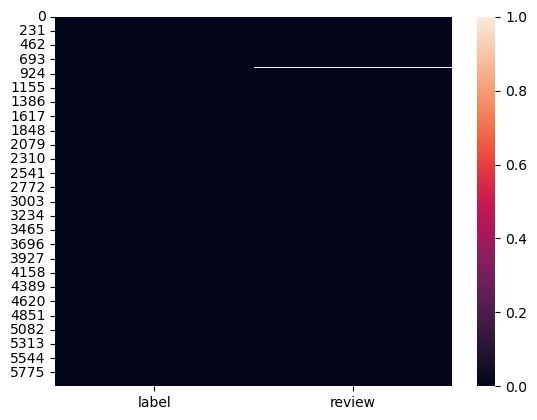

In [4]:
# Check for NaN values:
sns.heatmap(df.isnull())

In [5]:
df.dropna(inplace=True)

<Axes: >

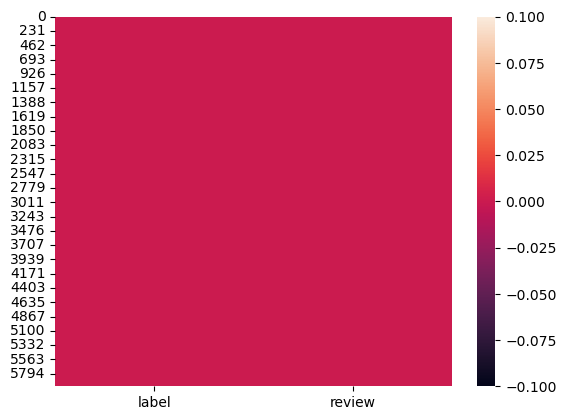

In [6]:
sns.heatmap(df.isnull())

In [10]:
# Check for whitespace strings (it's OK if there aren't any!):

blanks = []

for i,l,rv in df.itertuples():
    if rv.isspace():
        blanks.append(i)







In [11]:
blanks

[]

In [12]:
df['label']

0       pos
1       pos
2       pos
3       neg
4       pos
       ... 
5995    pos
5996    neg
5997    neg
5998    pos
5999    pos
Name: label, Length: 5980, dtype: object

In [13]:
from sklearn.model_selection import train_test_split
X=df['review']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])









In [15]:
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [16]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [17]:
# Report the confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))

[[900  91]
 [ 63 920]]


In [18]:
# Print a classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.93      0.91      0.92       991
         pos       0.91      0.94      0.92       983

    accuracy                           0.92      1974
   macro avg       0.92      0.92      0.92      1974
weighted avg       0.92      0.92      0.92      1974



In [19]:
# Print the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test,predictions)

0.9219858156028369